In [66]:
import numpy as np
import os
import time

DATA_PATH = os.path.join('Custom Dataset')
actions = np.array([folder for folder in os.listdir(DATA_PATH)])

In [67]:
label_map = {label:num for num, label in enumerate(actions)}

dataset, labels = [], []
for action in actions:
    for data in range(len(os.listdir(os.path.join(DATA_PATH, action)))):
        res = np.load(os.path.join(DATA_PATH, action, "{}.npy".format(data)), allow_pickle=True)
        dataset.append(res)
        labels.append(label_map[action])

In [68]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
        
X = np.array(dataset)
X = X.reshape(X.shape[0], 1, X.shape[1])

y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

startTime = time.time()
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=50, callbacks=[tb_callback])
endTime = time.time()

print("Training Duration: ", endTime - startTime)

model.save('custom.h5')

Epoch 1/50
1125/1125 [==============================] - 14s 6ms/step - loss: 2.3759 - categorical_accuracy: 0.2713 - val_loss: 1.5775 - val_categorical_accuracy: 0.4372
Epoch 2/50
1125/1125 [==============================] - 6s 6ms/step - loss: 1.3028 - categorical_accuracy: 0.5513 - val_loss: 1.0687 - val_categorical_accuracy: 0.6230
Epoch 3/50
1125/1125 [==============================] - 6s 6ms/step - loss: 0.8062 - categorical_accuracy: 0.7254 - val_loss: 0.5850 - val_categorical_accuracy: 0.8025
Epoch 4/50
1125/1125 [==============================] - 6s 6ms/step - loss: 0.5159 - categorical_accuracy: 0.8302 - val_loss: 0.3786 - val_categorical_accuracy: 0.8695
Epoch 5/50
1125/1125 [==============================] - 7s 6ms/step - loss: 0.3441 - categorical_accuracy: 0.8888 - val_loss: 0.4455 - val_categorical_accuracy: 0.8407
Epoch 6/50
1125/1125 [==============================] - 7s 6ms/step - loss: 0.2477 - categorical_accuracy: 0.9213 - val_loss: 0.2013 - val_categorical_accuracy

C:\Users\leozh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 3ms/step
Accuracy: 0.9945
Precision Score: 0.9945576995490579
Recall Score: 0.9945
F1 Score: 0.9944876158116819
Classification Report:               precision    recall  f1-score   support

         Ada       1.00      1.00      1.00       228
         Aku       0.98      1.00      0.99       204
         Apa       0.98      0.95      0.96       185
       Bagus       0.98      1.00      0.99       194
       Cepat       1.00      0.96      0.98       212
       Cinta       1.00      1.00      1.00       197
         Dan       1.00      1.00      1.00       200
       Dekat       1.00      0.99      1.00       208
          Di       0.97      1.00      0.98       199
       Duduk       1.00      0.99      0.99       208
        Hari       1.00      1.00      1.00       192
         Ini       0.98      1.00      0.99       195
       Jalan       1.00      0.97      0.99       196
      Jangan       1.00      1.00      1.00       186
        

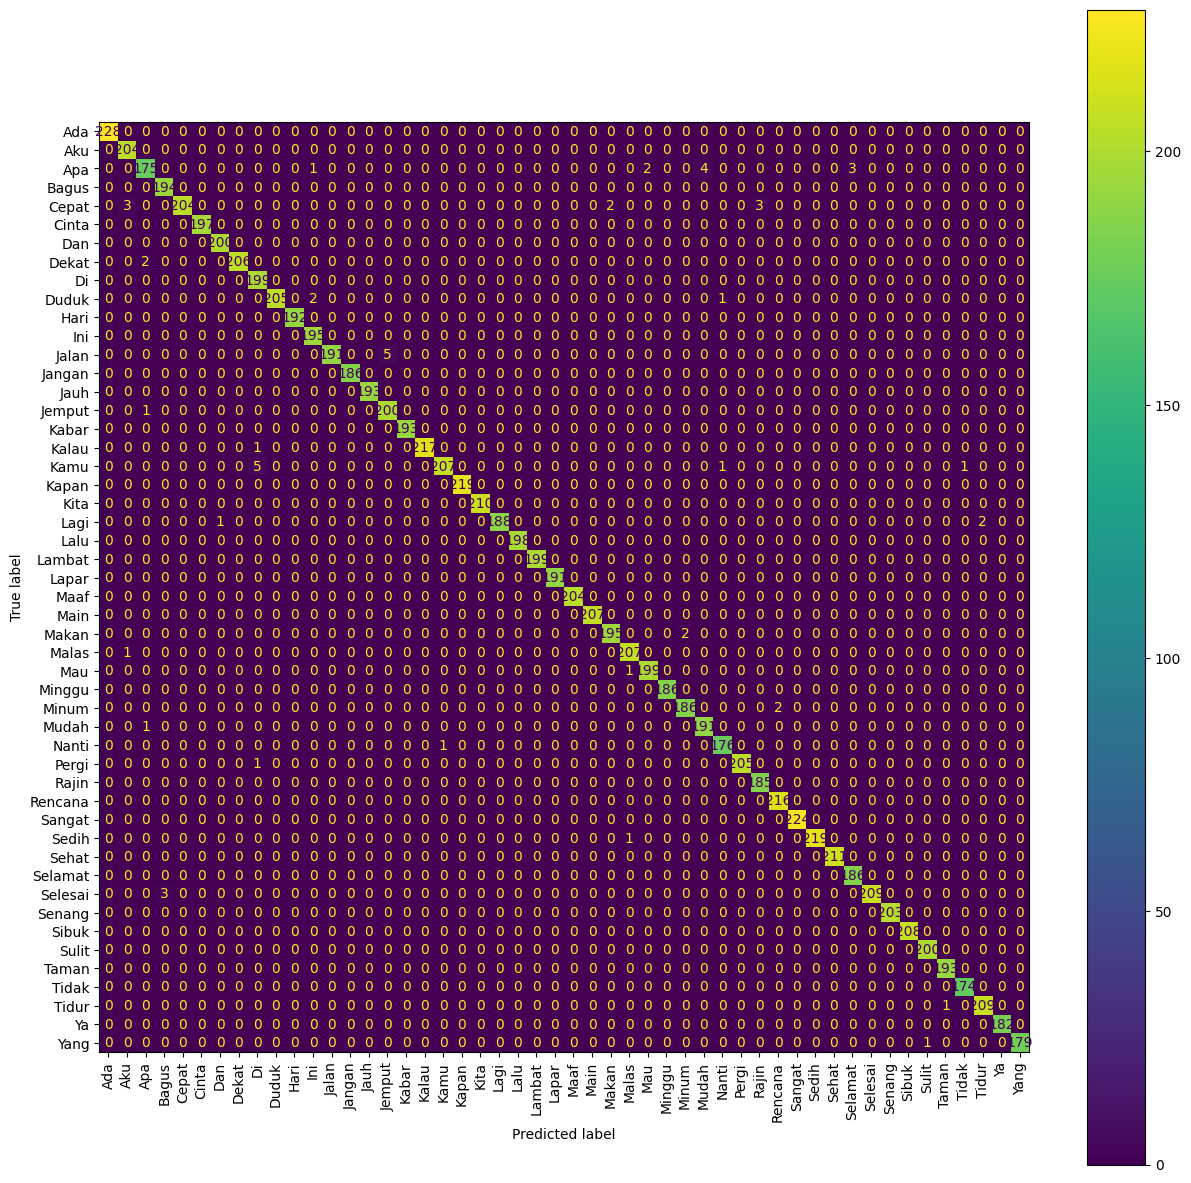

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y_test]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test2, predictions), display_labels = actions)
print(f"Accuracy: {accuracy_score(y_test2, predictions)}")
print(f"Precision Score: {precision_score(y_test2, predictions, average='weighted')}")
print(f"Recall Score: {recall_score(y_test2, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test2, predictions, average='weighted')}")
print(f"Classification Report: {classification_report(y_test2, predictions, target_names=actions)}")


fig, ax = plt.subplots(figsize=(15,15))
print(f"Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')


1563/1563 [==============================] - 5s 3ms/step
Accuracy: 0.9957
Precision Score: 0.9957537342870256
Recall Score: 0.9957
F1 Score: 0.9956912069797272
Classification Report:               precision    recall  f1-score   support

         Ada       1.00      1.00      1.00      1000
         Aku       0.98      1.00      0.99      1000
         Apa       0.99      0.96      0.98      1000
       Bagus       0.99      1.00      0.99      1000
       Cepat       1.00      0.96      0.98      1000
       Cinta       1.00      1.00      1.00      1000
         Dan       1.00      1.00      1.00      1000
       Dekat       1.00      1.00      1.00      1000
          Di       0.98      1.00      0.99      1000
       Duduk       1.00      0.99      1.00      1000
        Hari       1.00      1.00      1.00      1000
         Ini       0.99      1.00      1.00      1000
       Jalan       1.00      0.97      0.99      1000
      Jangan       1.00      1.00      1.00      1000
      

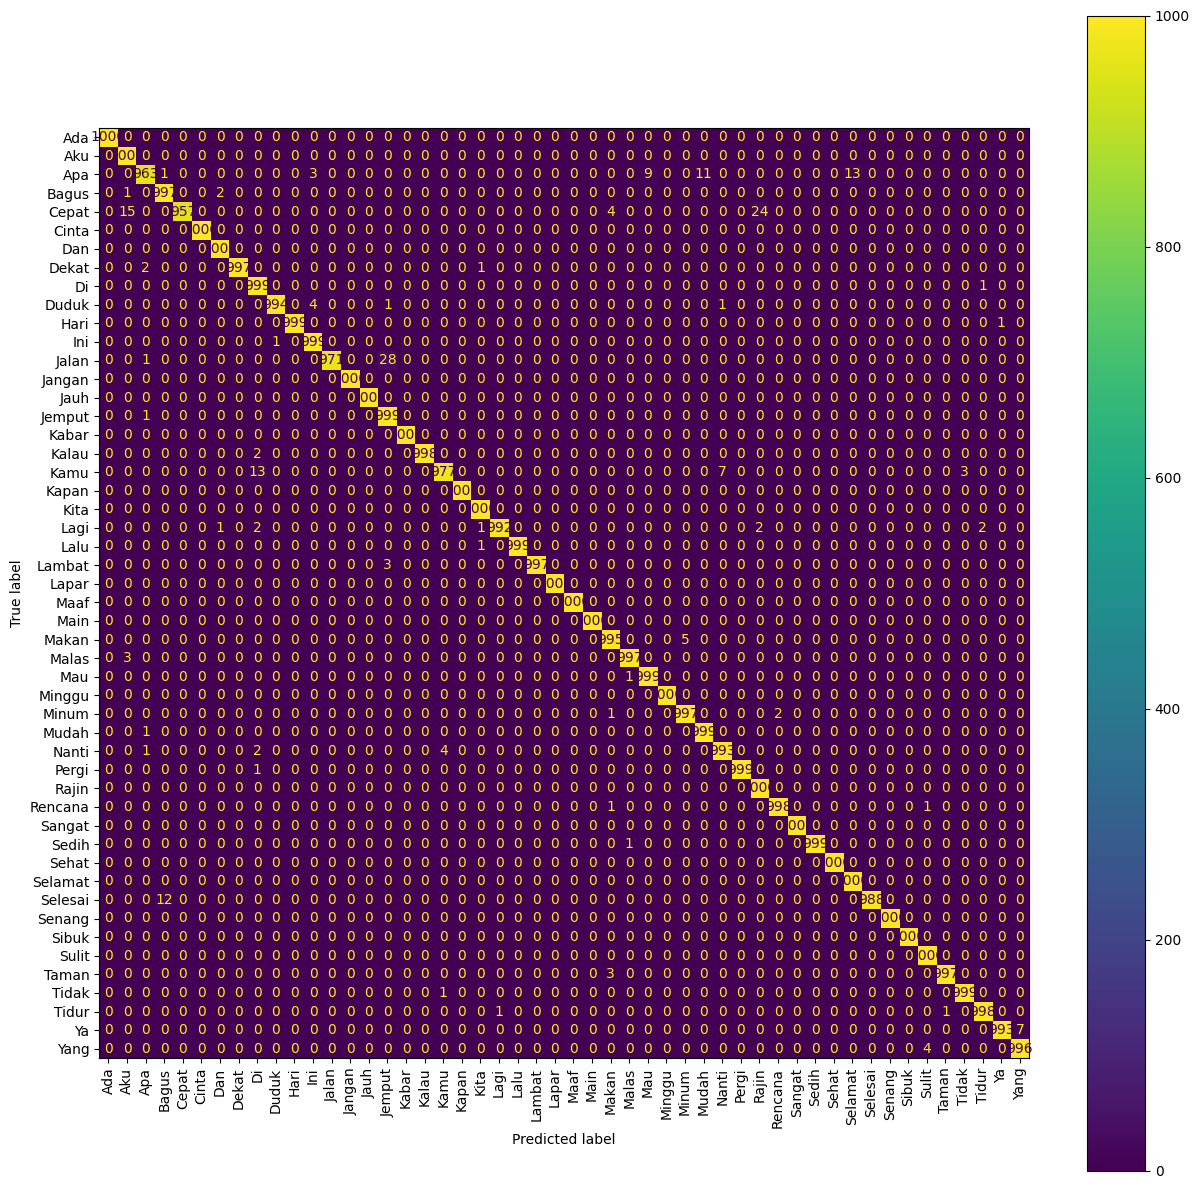

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test2, predictions), display_labels = actions)
print(f"Accuracy: {accuracy_score(y_test2, predictions)}")
print(f"Precision Score: {precision_score(y_test2, predictions, average='weighted')}")
print(f"Recall Score: {recall_score(y_test2, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test2, predictions, average='weighted')}")
print(f"Classification Report: {classification_report(y_test2, predictions, target_names=actions)}")

fig, ax = plt.subplots(figsize=(15,15))
print(f"Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')


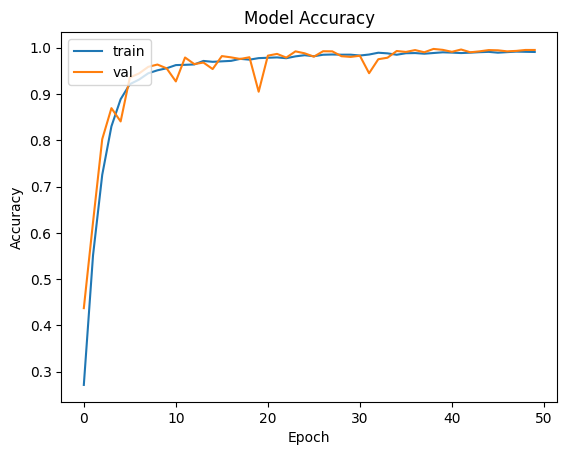

In [72]:
from matplotlib import pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

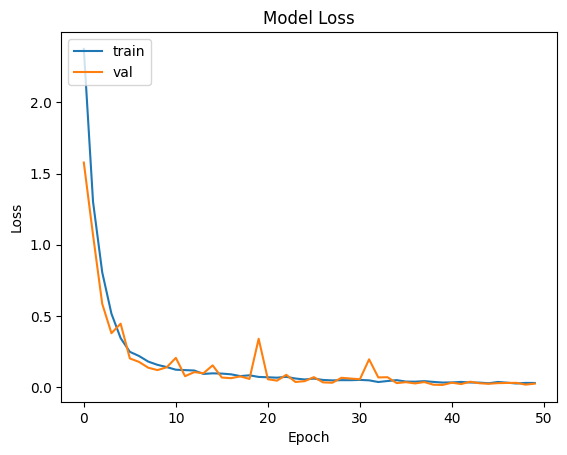

In [73]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()